In [166]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as Ticker
import dabest

In [40]:
def even(x):
    alleven = True
    mistakeloc = []
    for i in range(0, len(x)):
        if x[i] % 2 != 0:
            alleven = False
            mistakeloc.append(x[i])
    if alleven == False:
        return alleven, mistakeloc
    else:
        return alleven, 'No issues'

def odd(x):
    allodd = True
    mistakeloc = []
    for i in range(0, len(x)):
        if x[i] % 2 != 1:
            allodd = False
            mistakeloc.append(x[i])
    if allodd == False:
        print(mistakeloc)
        return allodd, mistakeloc
    else:
        return allodd, 'No issues'

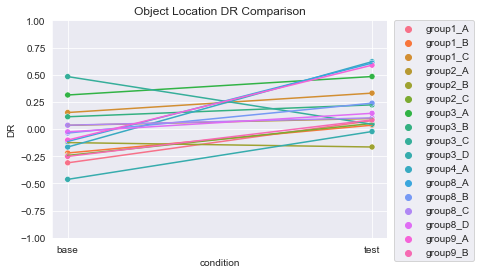

In [315]:
folder = '../data/round2/cohort2'
#initialize df
overall = pd.DataFrame()
subid = []; condition = []; DR = []; unmovedobj = []; movedobj = []; totalobjexp = []
unmovedvisits = []; movedvisits = []

subdf = pd.DataFrame()



#pull files from folder
directory = folder
sheets = []
for filename in os.scandir(directory):
    if filename.is_file():
        sheets.append(filename.path)

basesheets = [s for s in sheets if 'base' in s]
basesheets.sort()
testsheets = [s for s in sheets if 'test' in s]
testsheets.sort()

#check for correct numbers of files
if len(basesheets) != len(testsheets):
    print('Error: Unequal number of base and test files')

for i in range(0, len(basesheets)):
    #make data easier to read
    base = pd.read_csv(basesheets[i])
    base = base.dropna()
    base = base.reset_index(drop=True)
    test = pd.read_csv(testsheets[i])
    test = test.dropna()
    test = test.reset_index(drop=True)

    #check for data entry mistakes in baseline files
    base_starts = np.where(base.action.str.contains('start'))[0]
    test_starts = np.where(test.action.str.contains('start'))[0]
    base_stops = np.where(base.action.str.contains('stop'))[0]
    test_stops = np.where(test.action.str.contains('stop'))[0]

    if even(base_starts)[0] == False:
        print('File: ', basesheets[i], '. Error(s) at ', even(base_starts)[1])
    if even(test_starts)[0] == False:
        print('File: ', testsheets[i], '. Error(s) at ', even(test_starts)[1])

    if odd(base_stops)[0] == False:
        print('File: ', basesheets[i], '. Error(s) at ', odd(base_stops)[1])
    if odd(test_stops)[0] == False:
        print('File: ', testsheets[i], '. Error(s) at ', odd(test_stops)[1])

    if len(base_starts) != len(base_stops):
        print('Error: unequal number of starts and stop in ', basesheets[i])
    if len(test_starts) != len(test_stops):
        print('Error: unequal number of starts and stop in ', testsheets[i])

    t1 = 0; t2 = 0; t3 = 0; t4 = 0
    visit1base = 0; visit2base = 0; visit1test = 0; visit2test = 0
    
    base1sub = []; base2sub = []; test1sub = []; test2sub = []

    for j in range(0, len(base)):
        if base.action[j] == 'object1_start':
            base1sub.append((base.frame[j+1] - base.frame[j])/60)
            t1 = t1 + (base.frame[j+1] - base.frame[j])/60
            visit1base = visit1base + 1
        elif base.action[j] == 'object2_start':
            base2sub.append((base.frame[j+1] - base.frame[j])/60)
            t2 = t2 + (base.frame[j+1] - base.frame[j])/60
            visit2base = visit2base + 1
    for j in range(0, len(test)):
        if test.action[j] == 'object1_start':
            test1sub.append((test.frame[j+1] - test.frame[j])/60)
            t3 = t3 + (test.frame[j+1] - test.frame[j])/60
            visit1test = visit1test + 1
        elif test.action[j] == 'object2_start':
            test2sub.append((test.frame[j+1] - test.frame[j])/60)
            t4 = t4 + (test.frame[j+1] - test.frame[j])/60
            visit2test = visit2test + 1



    DRbase = (t2 - t1)/(t2 + t1)
    DRtest = (t4 - t3)/(t4 + t3)

    subid.append(basesheets[i][23:31]); subid.append(basesheets[i][23:31])
    condition.append('base'); condition.append('test')
    DR.append(DRbase); DR.append(DRtest)
    unmovedobj.append(t1)
    unmovedobj.append(t3)
    unmovedvisits.append(visit1base)
    unmovedvisits.append(visit1test)
    movedobj.append(t2)
    movedobj.append(t4)
    movedvisits.append(visit2base)
    movedvisits.append(visit2test)
    totalobjexp.append(t1+t2)
    totalobjexp.append(t3+t4)


overall['subid'] = subid
overall['condition'] = condition
overall['DR'] = DR
overall['Time at Unmoved'] = unmovedobj
overall['Visits to Unmoved'] = unmovedvisits
overall['Time at Moved'] = movedobj
overall['Visits to Moved'] = movedvisits
overall['Total Obj Exploration'] = totalobjexp

plt.figure(0)
sns.set_style("darkgrid")
ax = sns.scatterplot(x = "condition", y = "DR", hue = "subid", data = overall).set(title = 'Object Location DR Comparison', ylim=(-1,1))
ax1 = sns.lineplot(x = "condition", y = "DR", hue = "subid", legend = False, data = overall)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [389]:
def plot_binneddata(folder = 'C:/Users/ryan_/Documents/behavior_codebook/data/round2/cohort2', mouseid = 'group1_A', baseinterval = 60, testinterval = 30):

    #folder: must be folder with relevant datasheets
        #Ex: 'C:/Users/ryan_/Documents/behavior_codebook/data/round2/cohort2'
    #mouseid: designated mouse subid input as str (Ex: 'group1_A')
    #baseinterval as integer value representing interval time in seconds for base video
        #Ex: 60 means that each interval is 60 seconds long. Since the base data is for 10 minutes, one should 
        #    expect to see 10 data points for these plots
    #testinterval as integer value representing interval time in seconds for test video
        #Ex: 15 means that each interval is 15 seconds long. Since the test data is for 5 minutes, one should 
        #   expect to see 20 data points for these plots



    directory = folder
    sheets = []
    for filename in os.scandir(directory):
        if filename.is_file():
            sheets.append(filename.path)

    basesheets = [s for s in sheets if 'base' in s]
    basesheets.sort()
    testsheets = [s for s in sheets if 'test' in s]
    testsheets.sort()

    basefile = [s for s in basesheets if mouseid in s][0]
    testfile = [s for s in testsheets if mouseid in s][0]

    base = pd.read_csv(basefile)
    base = base.dropna()
    base = base.reset_index(drop=True)
    test = pd.read_csv(testfile)
    test = test.dropna()
    test = test.reset_index(drop=True)
        
    base1time = []; base2time = []; test1time = []; test2time = []
    base1framestart = []; base2framestart = []; test1framestart = []; test2framestart = []
    base1framestop = []; base2framestop = []; test1framestop = []; test2framestop = []

    for j in range(0, len(base)):
        if base.action[j] == 'object1_start':
            base1time.append((base.frame[j+1] - base.frame[j])/60)
            base1framestart.append(base.frame[j])
            base1framestop.append(base.frame[j+1])
        elif base.action[j] == 'object2_start':
            base2time.append((base.frame[j+1] - base.frame[j])/60)
            base2framestart.append(base.frame[j])
            base2framestop.append(base.frame[j+1])
    for j in range(0, len(test)):
        if test.action[j] == 'object1_start':
            test1time.append((test.frame[j+1] - test.frame[j])/60)
            test1framestart.append(test.frame[j])
            test1framestop.append(test.frame[j+1])
        elif test.action[j] == 'object2_start':
            test2time.append((test.frame[j+1] - test.frame[j])/60)
            test2framestart.append(test.frame[j])
            test2framestop.append(test.frame[j+1])
        

    group1A_base1 = pd.DataFrame()
    group1A_base1['time'] = base1time
    group1A_base1['start'] = base1framestart
    group1A_base1['stop'] = base1framestop

    group1A_base2 = pd.DataFrame()
    group1A_base2['time'] = base2time
    group1A_base2['start'] = base2framestart
    group1A_base2['stop'] = base2framestop

    group1A_test1 = pd.DataFrame()
    group1A_test1['time'] = test1time
    group1A_test1['start'] = test1framestart
    group1A_test1['stop'] = test1framestop

    group1A_test2 = pd.DataFrame()
    group1A_test2['time'] = test2time
    group1A_test2['start'] = test2framestart
    group1A_test2['stop'] = test2framestop

    bint = int(36000/(60*baseinterval) + 1)
    tint = int(18000/(60*testinterval) + 1)

    intbase = np.linspace(meta.trial_start_1[0], meta.trial_start_1[0] + 36000, bint)
    inttest = np.linspace(meta.trial_start_1[3], meta.trial_start_1[3] + 18000, tint)

    binbase1 = []
    binbase2 = []
    binbasetotal = []
    bintest1 = []
    bintest2 = []
    bintesttotal = []

    for i in range(0, len(intbase)-1):
        idx = np.where((group1A_base1.start > intbase[i]) & (group1A_base1.start < intbase[i+1]))[0]
        a = sum(group1A_base1.time[idx])
        binbase1.append(a)
        idx = np.where((group1A_base2.start > intbase[i]) & (group1A_base2.start < intbase[i+1]))[0]
        b = sum(group1A_base2.time[idx])
        binbase2.append(b)
        binbasetotal.append((a+b))
    for i in range(0, len(inttest)-1):
        idx = np.where((group1A_test1.start > inttest[i]) & (group1A_test1.start < inttest[i+1]))[0]
        a = sum(group1A_test1.time[idx])
        bintest1.append(a)
        idx = np.where((group1A_test2.start > inttest[i]) & (group1A_test2.start < inttest[i+1]))[0]
        b = sum(group1A_test2.time[idx])
        bintest2.append(b)
        bintesttotal.append((a+b))


    binnedbase = pd.DataFrame()
    binnedbase['Obj1'] = binbase1
    binnedbase['Obj2'] = binbase2
    binnedbase['Totalexp'] = binbasetotal

    binnedtest = pd.DataFrame()
    binnedtest['Obj1'] = bintest1
    binnedtest['Obj2'] = bintest2
    binnedtest['Totalexp'] = bintesttotal


    fig, axs = plt.subplots(nrows=1, ncols=2)

    plt.figure(0)
    ax = sns.lineplot(x = np.linspace(1, bint-1, bint-1), y = 'Totalexp', data = binnedbase, ax = axs[0]).set(title = 'Base Binned Total Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")
    ax = sns.lineplot(x = np.linspace(1, tint-1, tint-1), y = 'Totalexp', data = binnedtest, ax = axs[1]).set(title = 'Test Binned Total Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")

    fig, axs = plt.subplots(nrows=1, ncols=2)
    plt.figure(1)
    ax1 = sns.lineplot(x = np.linspace(1, bint-1, bint-1), y = 'Obj1', data = binnedbase, ax = axs[0]).set(title = 'Base Binned Obj 1 Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")
    ax1 = sns.lineplot(x = np.linspace(1, tint-1, tint-1), y = 'Obj1', data = binnedtest, ax = axs[1]).set(title = 'Test Binned Obj 1 Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")

    fig, axs = plt.subplots(nrows=1, ncols=2)
    plt.figure(2)
    ax2 = sns.lineplot(x = np.linspace(1, bint-1, bint-1), y = 'Obj2', data = binnedbase, ax = axs[0]).set(title = 'Base Binned Obj 2 Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")
    ax2 = sns.lineplot(x = np.linspace(1, tint-1, tint-1), y = 'Obj2', data = binnedtest, ax = axs[1]).set(title = 'Test Binned Obj 2 Exploration Time',
        xlabel = "Interval Number", ylabel = "Time exploring obj during each interval (s)")




<Figure size 432x288 with 0 Axes>

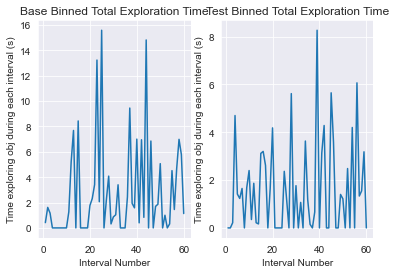

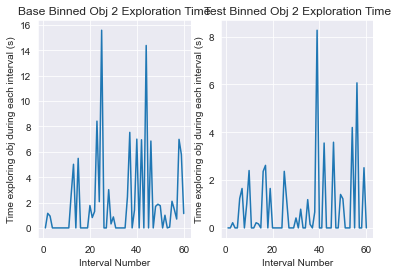

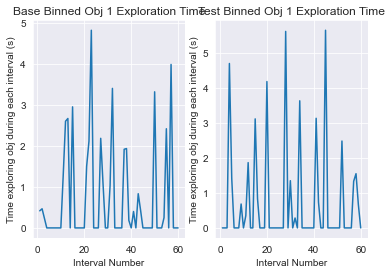

In [392]:
plot_binneddata(mouseid = 'group3_C', baseinterval = 10, testinterval = 5)

In [346]:
meta = pd.read_csv('../data/object_location_validation_metadata.csv')
idx = meta.loc[meta.subid.str.contains('group')]['subid'].sort_values().index
overall['genotype'] = meta.genotype[idx].reset_index(drop = True)

basefile = [s for s in basesheets if 'group1_A' in s][0]

basefile


'../data/round2/cohort2\\group1_A_OLbase-07152022130400.csv'

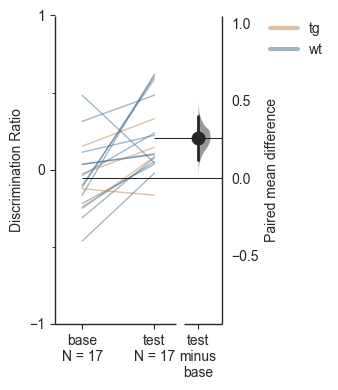

In [168]:
df = pd.DataFrame()

df['subid'] = sorted(list(set(overall.subid)))

base = overall.loc[overall.condition.str.contains('base')].reset_index(drop=True)
test = overall.loc[overall.condition.str.contains('test')].reset_index(drop=True)

df['base'] = base.DR
df['test'] = test.DR
df['genotype'] = base.genotype

x = dabest.load(df, idx = ('base', 'test'), id_col = 'subid', paired= True)
f = x.mean_diff.plot(swarm_ylim=(-1, 1), contrast_ylim=(-1, 1), swarm_label="Discrimination Ratio",
                                     contrast_label="Paired mean difference", color_col = 'genotype')
x.mean_diff.results

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(1))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.5))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

In [178]:
#plotting obj exp over time

group1Abase = pd.read_csv(basesheets[0])
group1Abase = group1Abase.dropna().reset_index(drop=True)

start = meta.trial_start_1[0]
stop = start + 3600




#### 